# Data, Models, and Errors

In this notebook we will look at the most simple machine learning model, namely *linear regression*. Eventhough it is simple, linear regression and its many extensions are still powerful and should always serve as a baseline model: If you try build a machine learning model for a problem where you can use linear regression, whatever model you build you should always compare its preformance to linear regression.

This notebook also serve another purpose. It will get you more familiar with python and some of the most central packages and data structures we are going to use in this course.

### Importing data

We will start from the very beginning, where most machine learning model build starts, namely by reading in some data. In this case a csv file. The easiest way to read in data for data analysis is with the panda package. So we will import the pandas package and read in the csv file 'potatoprises.csv'.

In [1]:
import pandas as pd
potato_prices = pd.read_csv("/Users/henning/Documents/Kurser/DeepLearning2020/Day1/potatoprices.csv")

Did you get an error? Note that you need to write the full path own to the fileDid you get an error? Note that you need to write the full path own to the file

Pandas is a heavily used package for doing all sort of data analysis i Python. For those familiar with R, pandas allow us to use data structures that resembels R's data.frame data struture. For more about pandas see: https://pandas.pydata.org/

Have a look at the data:

In [2]:
potato_prices

,kg,price
0,0.878,0.971063
1,0.713,0.910759
2,0.039,0.516968
3,0.894,0.880506
4,0.223,0.532087
...,...,...
95,0.381,0.755450
96,0.484,0.736762
97,0.257,0.622426
98,0.584,0.795793


Let us now plot the data. Actually, as we loaded in the data using the pandas package, our data is in a pandas data frame type object (try to run the code `type(potato_prices)`), which means that there is alread plotting abilities in the object. So we could just do:

<AxesSubplot:>

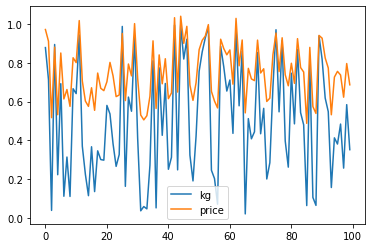

In [3]:
potato_prices.plot()

(For some reason, still unknown to me, the plot does not always show up the first time. If that is the case, just execute the cell again.)

To make the plots bigger in Jupyter Notebook such that they are easier to see we can use the following line of code. (You do not need to understand this now.)

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

<AxesSubplot:>

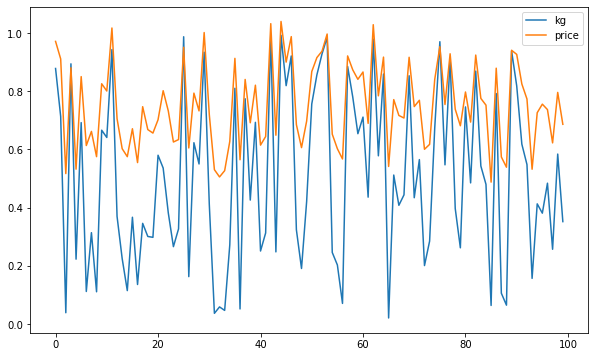

In [5]:
potato_prices.plot()

**Question:** What is the x-axis and y-axis representing here?

Answer: The y-axis is the value (for the variables 'kg' and 'price', while the x-axis is simply the index (row number) of each data point. Unless we deal with data in some chronological order, this is not very useful.

As your goal is to train a model that can predict the price of an amount of potatoes, we are interested in the relationship between the two variables (or features), *kg* and *price*. The better see such a potential relationship, we usually use a scatterplot. To do this, we can just use the following code:

<AxesSubplot:xlabel='kg', ylabel='price'>

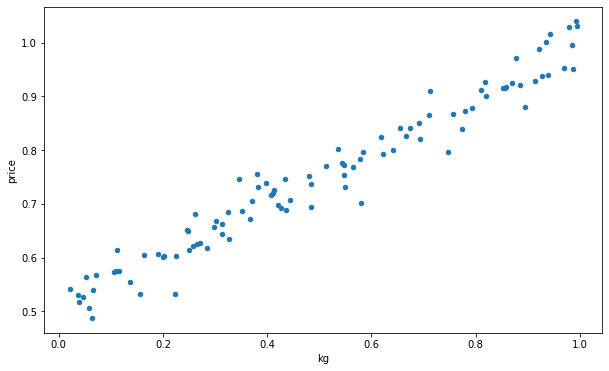

In [6]:
potato_prices.plot.scatter(x = 'kg', y = 'price')

### Simple linear regression

There seems to be a fairly linear relationship between $kg$ and $price$. A model that models that relationship will be a straight line in the 'kg'-'price' plane and can be represented by an equation of the form

$$
price = f(kg) = a * kg + b , 
$$

In other words, the variable $price$ is a function of the variable $kg$. In this case we call $price$ the *response variable* or the *dependent variable*. $kg$ we call the *independent variable*, a *is a *parameter*. In the equation above, $a$ and $b$ are constant values we do not know at forehand. Each possible instance of $a$ and $b$ will give rise to one particular (different) model. In the particular case of linear regression a parameter like $a$ is also refered to as a *coefficient* and $b$ the *intercept*.

The learning part of machine learning, often also refered to as the fitting process, is about comming up with good (or the best) values for the parameters of the model (in this case $a$ and $b$).

Let us try out a few possible such models (i.e. values for $a$ and $b$). Try to understand what the code below does and how we plot the different models. (For now ignore the code line `import matplotlib.pyplot as plt`.)

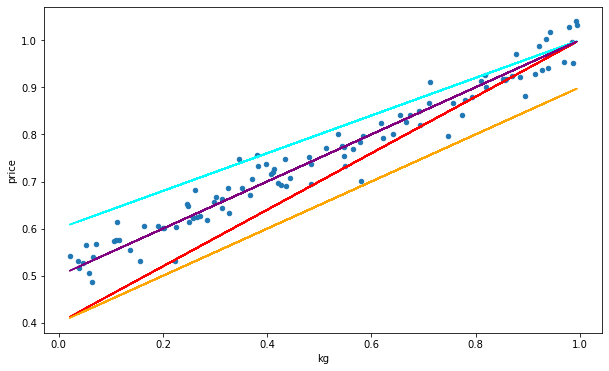

In [7]:
x = potato_prices['kg']
y = potato_prices['price']
model_1 = 0.6 * x + 0.4
model_2 = 0.5 * x + 0.4
model_3 = 0.4 * x + 0.6
model_4 = 0.5 * x + 0.5

import matplotlib.pyplot as plt
potato_prices.plot.scatter(x = 'kg', y = 'price')
plt.plot(x, model_1, 'red')
plt.plot(x, model_2, 'orange')
plt.plot(x, model_3, 'cyan')
plt.plot(x, model_4, 'purple')

**Question:** Which model seems to be the best and what is the values of $a$ and $b$ in this case? Do you think it is possible to find a better model?

Answer: The purple line seems to represent the best model here, in the sense that it seems to fit the data best. However, it might just be a lucky guess and there is no reason to assume that the purple model is the best possible model - we need an algorithm/solution formula to tell how to find the best model. (Again, we need to agree on precisely what we mean by "best model".)

Linear regression is a method for finding the best such linear model. (What "best" means here, we will get back to.) One advantage of linear regression is that there is a closed form solution. That is, given a dataset, there is a formula that tells us how to find all the parameters for the best linear model. This is far from true for most machine learning models. Therefore, we will later discuss more general methods for finding good models. (Finding a good model that fits well to data is also refered to as *fitting*.) Below is an implementation of closed form solution for linear regression. Have a look at it and how we plot it.

In [8]:
import numpy as np

sxy = 0
sxx = 0
for i in range(x.shape[0]):
    sxy += (x[i] - np.mean(x)) * (y[i] - np.mean(y))
    sxx += (x[i] - np.mean(x)) * (x[i] - np.mean(x))
    
a_linreg = sxy / sxx
b_linreg = np.mean(y) - a_linreg * np.mean(x)

print("a_linreg:", a_linreg)
print("b_linreg:", b_linreg)

y_pred = a_linreg * x + b_linreg

a_linreg: 0.48522262251234916
b_linreg: 0.5077827414473608


**Exercise:** Plot the data as well as this new linear regression model, just as we plotted the four models above.

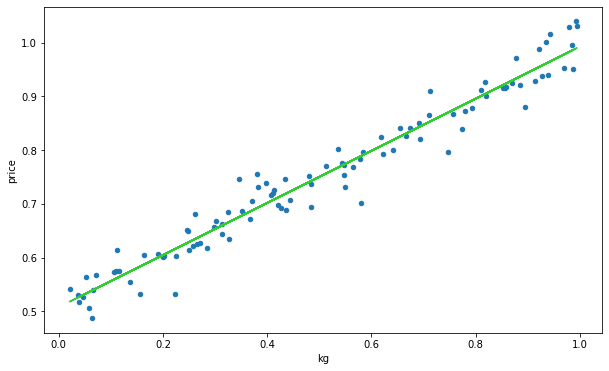

In [9]:
# answer
potato_prices.plot.scatter(x = 'kg', y = 'price')
plt.plot(x, y_pred, 'limegreen')

**Question:** According to this linear regression model, what is the price for 0.8kg of potatoes?

In [10]:
# Answer:
a_linreg * 0.8 + b_linreg

0.8959608394572401

### Measuring model error

There are several ways of measuring how good a model is. For regression tasks, like our potato price case here, where we are trying to predict a continous variable (price), a natural measure of the *goodness of fit* of a model is the model error.

As explained in the note "A gentle introduction to machine learning" by Henning Christiansen, we can measure the error of a model using the following formula

$$
err = \sum_{i=1}^n (y_i - f_{predict}(x_i))^2 ,
$$

where $\{\langle x_i , y_i\rangle | 1 \leq i \leq n\}$ is our data set. So in our case, this formula takes for each data point and calculates the difference between the true price ($y_i$) and the predicted price ($y^{pred}_i$ = $f_{predict}(x_i)$), square this difference and finally sum up all these squared differences. The (non-squared) differences are represented as the orange lines in the plot below.

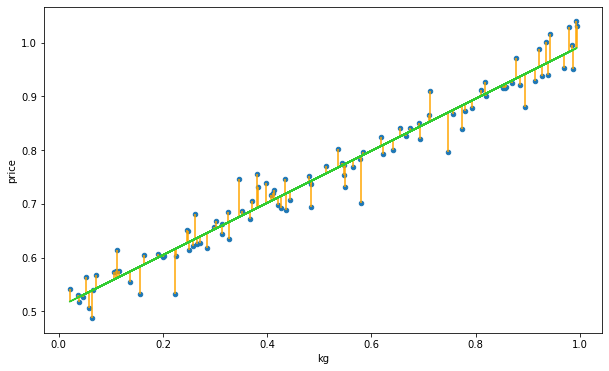

In [11]:
potato_prices.plot.scatter(x = 'kg', y = 'price')
plt.plot(x, y_pred, 'limegreen')
plt.vlines(x, y, y_pred, colors = "orange")

Note that the differences between the actual values and the predicted values ($y_i - y^{pred}_i$) are also refered to as the *residuals* of the model.

In the formula above we sum over all data points (which we have $n$ of), so the more data we use to fit the model, the higher this error might become. Therefore, it is often more natural to look at the *average* error. Taking the average of the above formula give us the following error formula also refered to as *mean squared error (MSE)*:

$$
MSE = \frac{1}{n}\sum_{i=1}^n (y_i - f_{predict}(x_i))^2 .
$$

Sometimes you will also meet the *root mean squared error (RMSE)*, which is obtained by taking the square root of the above formula:

$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n (y_i - f_{predict}(x_i))^2} .
$$

**Exercise:** Write a python function that calculate the mean squared error of a model. Calculate the MSE of the linear regression model above. Afterwards also calculate the MSE of the four original models we plotted in the beginning. Below is the skeleton for a python function that does it. You just have to fill in some code instead of the dots.

In [12]:
# Answer:
def my_mse(actual_y, predicted_y):
    mse = 0
    for i in range(actual_y.shape[0]):
        mse += (actual_y[i] - predicted_y[i]) ** 2 # Note: predicted_y = f_predict(x)
    mse = mse / actual_y.shape[0]
    return(mse)

print("The MSE of the linear regression model is:", my_mse(y, y_pred))

print("The MSE of the original model_1 is:", my_mse(y, 0.6 * x + 0.4))
print("The MSE of the original model_2 is:", my_mse(y, 0.5 * x + 0.4))
print("The MSE of the original model_3 is:", my_mse(y, 0.4 * x + 0.6))
print("The MSE of the original model_4 is:", my_mse(y, 0.5 * x + 0.5))

The MSE of the linear regression model is: 0.0009028718230789448
The MSE of the original model_1 is: 0.004576596943393313
The MSE of the original model_2 is: 0.011003357516104977
The MSE of the original model_3 is: 0.0039909358754272786
The MSE of the original model_4 is: 0.0009216506094102964


Hopefully you will see that the linear regression model indeed have the lowest error.

### Getting help from Python packages

Above we used the package pandas to help us import a data set as well as doing some plotting. As you might have noticed, we also used two other packages a bit, namely *matplotlib* and *numpy*. Matplotlib is the go-to package for plotting and numpy is the go-to package for numerical calculation. In this section we will look a little closer on these packages and add another one called *scikit-learn* (or *sklearn*). Together these four packages (pandas, numpy, matplotlib, and scikit-learn) make up the most used packages in any data scientist python toolbox, so remember them!

#### Numpy

The [numpy](http://www.numpy.org/) package is important as the numpy array is the data structure that all our data will be in when we will train neural network -- the book [Deep Learning with Python by Francios Chollet](https://www.manning.com/books/deep-learning-with-python) also refers to these multidimensional arrays as *tensors*. Note that a numpy array is something else than the standard array type of Python. It is recomended to have a closer look at Numpy, for instance this quickstart tutorial: https://docs.scipy.org/doc/numpy/user/quickstart.html 

Numpy arrays can hold numeric data in 1-dimensional objects (vectors), 2-dimensional object (matrices), 3-dimensional objects, etc.; such objects are collectively called *tensors*. In 2.2.8 on page 35 of the book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) there are examples how up to 5-dimensional tensors easily can occur with real data. Dimensions in numpy arrays are also refered to as axes.

Below is an example of a 1D, 2D and 3D array and how to construct such in with numpy:

In [13]:
import numpy as np

x_1D = np.array([1,2,3,4,17,42])
print("x_1D:")
print(x_1D)
print("-------------")

x_2D = np.array([[2, 4, 6, 8],
                [1,3,5,7],
                [42,43, 44, 45]])
print("x_2D:")
print(x_2D)
print("-------------")

x_3D = np.array([[[2, 4, 6],
                [6, 8, 10],
                [10, 12, 14]],
                 [[1,3,5],
                 [5,7,9],
                 [9,11,13]]])
print("x_3D:")
print(x_3D)

x_1D:
[ 1  2  3  4 17 42]
-------------
x_2D:
[[ 2  4  6  8]
 [ 1  3  5  7]
 [42 43 44 45]]
-------------
x_3D:
[[[ 2  4  6]
  [ 6  8 10]
  [10 12 14]]

 [[ 1  3  5]
  [ 5  7  9]
  [ 9 11 13]]]


Here `x_1D` is a 1-dimensional numpy array (a vector) of lenght 6 (i.e. it has one axis of length 6), `x_2D` a 2-dimensional numpy array with 3 rows and 4 columns (i.e. it has two axes of length 3 and 4), and `x_3D` is a 3-dimensional numpy array with 3 axes of length 2, 3, and 3.

**Exercise:** Look at the code for `x_1D`, `x_2D`, `x_3D` and make sure you understand how the sentence above is true. Then verify the sentence by calling the attributes `ndim` and `shape` on the numpy array objects. (See https://docs.scipy.org/doc/numpy/user/quickstart.html if you get stuck)

In [14]:
# Answer:
print("x_1D.ndim: ", x_1D.ndim)
print("x_1D.shape: ", x_1D.shape)
print("x_2D.ndim: ", x_2D.ndim)
print("x_2D.shape: ", x_2D.shape)
print("x_3D.ndim: ", x_3D.ndim)
print("x_3D.shape: ", x_3D.shape)

x_1D.ndim:  1
x_1D.shape:  (6,)
x_2D.ndim:  2
x_2D.shape:  (3, 4)
x_3D.ndim:  3
x_3D.shape:  (2, 3, 3)


*Remember the quickstart tutorial: https://docs.scipy.org/doc/numpy/user/quickstart.html*

#### Scikit-learn

Let us move on the actual machine learning and use the [scikit-learn](https://scikit-learn.org/stable/) package to train a linear model. More specificially we will use a *module* from the package called *linear_models*, so let us import that into Python:

In [15]:
from sklearn import linear_model

To use scikit-learn and the linear_model module inparticular, our data needs to be in numpy array format. More specifically our feature variable(s) x, needs to be a 2D array and our response variable y needs to be a 1D array. This we can easily do with a little help from the numpy package and the reshape function (the "-1" below in the reshaping of x refers to that we want all the data along the first axis of x)

In [16]:
x = np.reshape(np.array(x), (-1, 1))
y = np.array(y)

print("x: ", x)
print("--------------")
print("y: ", y)
print("--------------")
print("shape of x: ", x.shape)
print("shape of y: ", y.shape)

x:  [[0.878]
 [0.713]
 [0.039]
 [0.894]
 [0.223]
 [0.692]
 [0.112]
 [0.314]
 [0.111]
 [0.666]
 [0.641]
 [0.943]
 [0.37 ]
 [0.225]
 [0.115]
 [0.367]
 [0.136]
 [0.346]
 [0.301]
 [0.298]
 [0.58 ]
 [0.536]
 [0.382]
 [0.266]
 [0.327]
 [0.987]
 [0.163]
 [0.623]
 [0.55 ]
 [0.934]
 [0.412]
 [0.037]
 [0.059]
 [0.047]
 [0.272]
 [0.81 ]
 [0.052]
 [0.774]
 [0.426]
 [0.693]
 [0.251]
 [0.313]
 [0.994]
 [0.248]
 [0.992]
 [0.819]
 [0.921]
 [0.324]
 [0.191]
 [0.421]
 [0.756]
 [0.856]
 [0.928]
 [0.985]
 [0.246]
 [0.203]
 [0.071]
 [0.885]
 [0.78 ]
 [0.654]
 [0.711]
 [0.436]
 [0.979]
 [0.578]
 [0.859]
 [0.021]
 [0.512]
 [0.408]
 [0.444]
 [0.853]
 [0.434]
 [0.565]
 [0.201]
 [0.285]
 [0.674]
 [0.97 ]
 [0.547]
 [0.914]
 [0.397]
 [0.262]
 [0.746]
 [0.485]
 [0.869]
 [0.543]
 [0.48 ]
 [0.064]
 [0.792]
 [0.106]
 [0.065]
 [0.938]
 [0.818]
 [0.618]
 [0.548]
 [0.157]
 [0.413]
 [0.381]
 [0.484]
 [0.257]
 [0.584]
 [0.352]]
--------------
y:  [0.97106259 0.91075914 0.51696776 0.880506   0.53208665 0.85008333
 0.613379

**Question:** What is the dimensions of x and y now how long are their axes?

In [17]:
import numpy as np

sxy = 0
sxx = 0
for i in range(x.shape[0]):
    sxy += (x[i] - np.mean(x)) * (y[i] - np.mean(y))
    sxx += (x[i] - np.mean(x)) * (x[i] - np.mean(x))
    
a_linreg = sxy / sxx
b_linreg = np.mean(y) - a_linreg * np.mean(x)

print("a_linreg:", a_linreg)
print("b_linreg:", b_linreg)

y_pred = a_linreg * x + b_linreg

a_linreg: [0.48522262]
b_linreg: [0.50778274]


We can now train a linear model based on our reshaped data.

Paramters: 
 [0.48522262] 0.5077827414473609


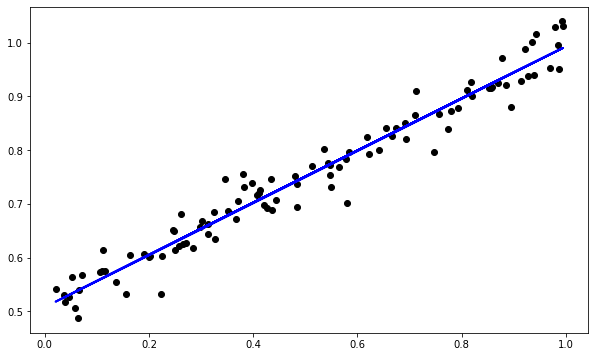

In [18]:
# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the model using the data
regr.fit(x, y)

# Calculate the predicted y values based on the linear model
y_pred = regr.predict(x)

# Printing the parameters a and b (also refered to as the coefficients and the intercept)
print('Paramters: \n', regr.coef_, regr.intercept_)

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, y_pred, color='blue', linewidth=2)

We see that we get the same model as with our manual inplementation of the linear regression solution formula. The code might not seem much shorter here, but this is more generic way of training a machine learning model. It is also easy extendable to the case where we have multiple feature variables instead of just one feature "kg". In that case, the length of the second axis of the 2-dimensional array x, will correspond to the number of feature variables we want to use.

Scikit-learn can also help us easily calculate errors. Moreover, it can help us calculate an *R-square* score as well. Intuitively the R-square score says something about how big a procentage of the variance in y we have explained by our predictor variables x. (see for instance: https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error:", mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print("R-squared:", r2_score(y, y_pred))


Mean squared error: 0.0009028718230789452
R-squared: 0.9569438846435006


#### Matplotlib

The [matplotlib](https://matplotlib.org/) package we have not talked about yet, but we have already used it several times. It is a great advantage to be able to plot ones data and models. It makes it easy to spot trends in data, outliers and errors in you code or model. We will not go into more details about matplotlib now, but just refer the package website and this tutorial, for instance: https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py 

THE FOLLOWING TWO QYASTIONS ARE TOO DIFFICUKT AND NOT REALLY WORTH SPENDING TIME ON

**Exercise:** Now, the price of potatoes does not only dependt on the amount you buy (in kg), but also on the time of year and whether it is new potatoes or not. Read in the data `potatopricesnew.csv`. In this data there are two new variables. The variable `month` is an integer between 1 and 12 representing the month of the year. The variable `new` is either 0 or 1, where 1 represent that it is new potatoes. Now build a linear regression model tha predicts the price of potatoes based on the features `kg`, `month`, and `new`.

In [20]:
# Answer:

In [21]:
potato_prices_new = pd.read_csv('/Users/henning/Documents/Kurser/DeepLearning2020/Day1/potatopricesnew.csv')

In [22]:
potato_prices_new.head()

,kg,new,month,price
0,0.878,0,5,1.616301
1,0.713,0,5,1.588549
2,0.039,1,9,1.653095
3,0.894,0,2,1.809937
4,0.223,0,1,1.609999


In [23]:
X_new = potato_prices_new[['kg', 'new', 'month']]
y_new = potato_prices_new['price']

In [48]:
X_new = np.array(X_new)
y_new = np.array(y_new)

In [49]:
regr_new = linear_model.LinearRegression()
regr_new.fit(X_new, y_new)
y_new_pred = regr_new.predict(X_new)
print('Paramters: \n', regr_new.coef_, regr_new.intercept_)

Paramters: 
 [0.45852216 0.28085211 0.00510788] 1.3061291849359726


In [50]:
print("Mean squared error:", mean_squared_error(y_new, y_new_pred))
print("R-squared:", r2_score(y_new, y_new_pred))

Mean squared error: 0.010972350061561104
R-squared: 0.7640753934291503


**Exercise:** As mentioned linear regression is one of the simplest, but still useful machine learning models. Besides deep neural networks, as well will talk a lot about in the rest of the course, some of the most popular and powerful machine learning models today are *Random Forest* and *Gradient Boosting*, which are both based on simple decision trees. Try and build a Random Forest and a Gradient Boosting model for the data of the previous exercise. Are you able to obtain better MSE and R-squared? (Hint: Google "scikit learn random forest regression" for instance.)

In [51]:
# solution
from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor()

clf.fit(X_new, y_new)

print("Mean squared error:", mean_squared_error(y_new, clf.predict(X_new)))
print("R-squared:", r2_score(y_new, clf.predict(X_new)))

Mean squared error: 0.00018517853649889366
R-squared: 0.9960183394510974


In [52]:
from sklearn.ensemble.forest import RandomForestRegressor

regr_rf = RandomForestRegressor()

regr_rf.fit(X_new, y_new)

print("Mean squared error:", mean_squared_error(y_new, clf.predict(X_new)))
print("R-squared:", r2_score(y_new, regr_rf.predict(X_new)))

Mean squared error: 0.00018517853649889366
R-squared: 0.9871437229227259


/opt/anaconda3/envs/AI_keras_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
